In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

#Define constants
m_u = 1.66e-24 #g
k_B = 1.3807e-16 # cm^2 g s^-2 K^-1
h_bar = 6.626176e-27 # erg s

rho = np.geomspace(1e-6,1,10) * (1e-3)
temp = np.geomspace(100,1000,10)

m = 28 * m_u
n = rho / m
def n_Q(T):
    return (m * k_B * T / (2 * np.pi * (h_bar**2)))**(3/2)

Text(0.5, 0.04, 'log10(T)')

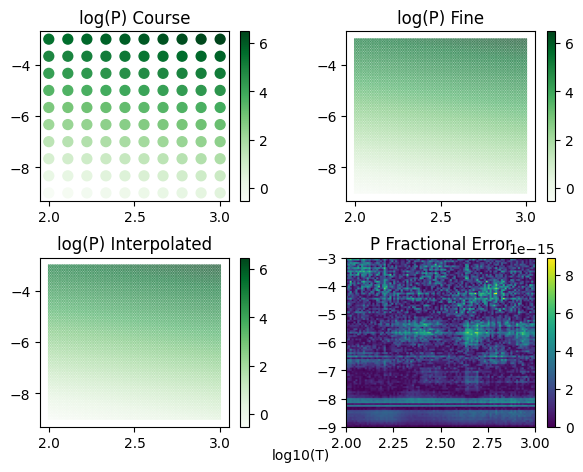

In [2]:
T, R = np.meshgrid(temp, rho)
P_data = (R / m) * k_B * T

interp_P = scipy.interpolate.RectBivariateSpline(np.log10(rho),np.log10(temp),np.log10(P_data))

rr = np.geomspace(1e-6,1,100) * (1e-3)
tt = np.geomspace(100,1000,100)
TT_P, RR_P = (np.meshgrid(tt, rr))
P_interp = interp_P(np.log10(rr),np.log10(tt))
P_actual = ((RR_P / m) * k_B * TT_P)
P_error = abs(((10**P_interp) - P_actual)) / P_actual



fig, axs = plt.subplots(2, 2)
plt.tight_layout(pad=2.0)  
fig1 = axs[0, 0].scatter(np.log10(T), np.log10(R), s=50, c=np.log10(P_data), cmap='Greens')
fig.colorbar(fig1, ax=axs[0, 0])
fig2 = axs[0, 1].scatter(np.log10(TT_P), np.log10(RR_P), s=0.1, c=np.log10(P_actual), cmap='Greens')
fig.colorbar(fig2, ax=axs[0, 1])
fig3 = axs[1, 0].scatter(np.log10(TT_P), np.log10(RR_P), s=0.1, c=(P_interp), cmap='Greens')
fig.colorbar(fig3, ax=axs[1, 0])
fig4 = axs[1, 1].imshow((P_error), origin='lower',extent=(2,3,-9,-3),aspect='auto')
fig.colorbar(fig4, ax=axs[1, 1])

for ax in axs.flat:
    ax.label_outer()

axs[0, 0].set_title('log(P) Course')
axs[0, 1].set_title('log(P) Fine')
axs[1, 0].set_title('log(P) Interpolated')
axs[1, 1].set_title('P Fractional Error')

fig.text(0.5, 0.04, 'log10(T)', ha='center')

Text(0.04, 0.5, 'log10(rho)')

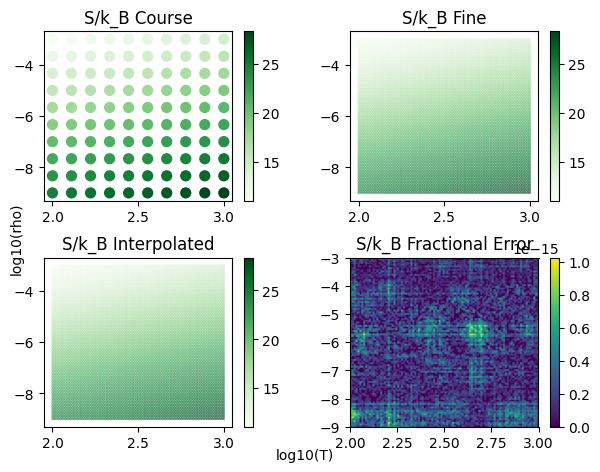

In [3]:
S_data = (5/2) - np.log(R / (m * n_Q(T))) 
interp_S = scipy.interpolate.RectBivariateSpline(np.log10(rho),np.log10(temp),S_data)

rr = np.geomspace(1e-6,1,100) * (1e-3)
tt = np.geomspace(100,1000,100)
TT_S, RR_S = (np.meshgrid(tt, rr))
S_interp = interp_S(np.log10(rr),np.log10(tt))
S_actual = (5/2) - np.log(RR_S / (m * n_Q(TT_S))) 
S_error = abs(((S_interp) - S_actual)) / S_actual

fig, axs = plt.subplots(2, 2)
plt.tight_layout(pad=2.0)  
fig1 = axs[0, 0].scatter(np.log10(T), np.log10(R), s=50, c=S_data, cmap='Greens')
fig.colorbar(fig1, ax=axs[0, 0])
fig2 = axs[0, 1].scatter(np.log10(TT_S), np.log10(RR_S), s=0.1, c=S_actual, cmap='Greens')
fig.colorbar(fig2, ax=axs[0, 1])
fig3 = axs[1, 0].scatter(np.log10(TT_S), np.log10(RR_S), s=0.1, c=S_interp, cmap='Greens')
fig.colorbar(fig3, ax=axs[1, 0])
fig4 = axs[1, 1].imshow((S_error), origin='lower',extent=(2,3,-9,-3),aspect='auto')
fig.colorbar(fig4, ax=axs[1, 1])

for ax in axs.flat:
    ax.label_outer()

axs[0, 0].set_title('S/k_B Course')
axs[0, 1].set_title('S/k_B Fine')
axs[1, 0].set_title('S/k_B Interpolated')
axs[1, 1].set_title('S/k_B Fractional Error')

fig.text(0.5, 0.04, 'log10(T)', ha='center')
fig.text(0.04, 0.5, 'log10(rho)', va='center', rotation='vertical')



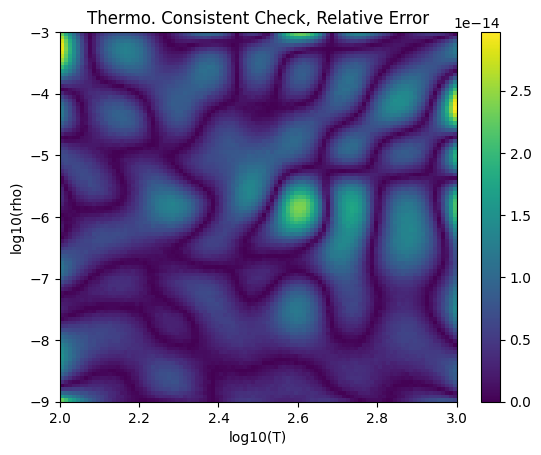

In [4]:
dS_dP_func = interp_S.partial_derivative(dx=1,dy=0)
dP_dT_func = interp_P.partial_derivative(dx=0,dy=1)

dS_dP = dS_dP_func(np.log10(rr),np.log10(tt))
dP_dT = dP_dT_func(np.log10(rr),np.log10(tt))

# The left and right handside of the partial derivative is manipulated so that the log of rho, temp, and pressure are used. This is why the equations below differ from the originals give.
# We also needed an expression for dP_dT to replace dP_dn
ls = -1 * dS_dP
rs = np.log(10) * dP_dT

frac_err = abs(ls - rs) /rs
plt.imshow((frac_err), origin='lower',extent=(2,3,-9,-3),aspect='auto')
plt.title("Thermo. Consistent Check, Relative Error")
plt.xlabel("log10(T)")
plt.ylabel("log10(rho)")
plt.colorbar()

Because we are interpolating with respect to the logarithmic values of temp and rho, and these scale linearly, based on analytic evalutation of the partial derivatives, it makes sense that both sides are equal. This is why the partial derivatives are constant at all points. Since both sides are equal, the error is on the order of the roundoff error. 